# Versuch 241: Wechselstromeigenschaften von RLC-Gliedern

In [1]:
#Benötigte Pakete
%matplotlib inline
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = 16, 9

## Teil 1: Bestimmung der Zeitkonstante eines RC-Glieds

Die Zeitkonstante eines RC-Glieds ergibt sich aus den Kenngrößen der Bauteile gemäß (\ref{eq:tau}):

\begin{align*}
    \tau_{theo} &= R \cdot C\\
    \Rightarrow \Delta \tau_{theo} &= \sqrt{\left(\frac{\Delta R}{R}\right)^2 - \left(\frac{\Delta C}{C}\right)^2}
\end{align*}

Bestimmt man die Halbwertszeit der Spannung, folgt der experimentell bestimmte Wert gemäß (\ref{eq:hwz}):


\begin{align*}
    \tau_{exp} &= \frac{T_{12}}{\ln{2}}\\
    \Rightarrow \Delta \tau_{exp} &= \frac{\Delta T_{12}}{\ln{2}}
\end{align*}

Für die Widerstände $R$ und Capazitäten $C$, haben wir die relativen Fehler:

\begin{align*}
    \Delta R &= 0.05 R\\
    \Delta C &= 0.10 R
\end{align*}

In [2]:
#Bestimmung der Halbwertszeit bei der Spannungsmessung

#erste Messreihe
C1=470e-9 #Farad
C1_err=0.1*C1 

R1=1e3 #Ohm
R1_err=0.05*R1

#es wurde zur Erhöhung der Genauigkeit die Zeit für 3x T_hw gemessen.
T_hw1=270e-6 #s
T_hw1_err=20e-6 #s

#zweite Messreihe
C2=4.7e-9 
C2_err=0.1*C2

R2=10e3
R2_err=0.05*R2

T_hw2=38.0e-6
T_hw2_err=0.5e-6

#dritte Messreihe
C3=47e-9
C3_err=0.1*C3

R3=R1
R3_err=R1_err

T_hw3=33.4e-6
T_hw3_err=T_hw2_err

#Halbwertszeit beim Stromverlauf
C4=47e-9
C4_err=0.1*C4

R4=R1
R4_err=R1_err

T_hw4=27.1e-6
T_hw4_err=T_hw2_err

In [3]:
#Theoretische Werte für Tau=R*C

tau_theo1= R1*C1 
#Fehler aus Fehlerfortpflanzung
tau_theo1_err=np.sqrt((C1*R1_err)**2+(R1*C1_err)**2)

tau_theo2= R2*C2 
tau_theo2_err=np.sqrt((C2*R2_err)**2+(R2*C2_err)**2)

tau_theo3= R3*C3 
tau_theo3_err=np.sqrt((C3*R3_err)**2+(R3*C3_err)**2)

print('Für die theoretischen Werte wurde ermittelt:')
print('tau_theo1 = ' + str(tau_theo1) + ' ± ' + str(tau_theo1_err))
print('tau_theo2 = ' + str(tau_theo2) + ' ± ' + str(tau_theo2_err))
print('tau_theo3 = ' + str(tau_theo3) + ' ± ' + str(tau_theo3_err))

Für die theoretischen Werte wurde ermittelt:
tau_theo1 = 0.00047 ± 5.254759747124506e-05
tau_theo2 = 4.7e-05 ± 5.254759747124505e-06
tau_theo3 = 4.7e-05 ± 5.254759747124505e-06


In [4]:
#Experimentelle Werte für Tau=T_hw/ln(2) 

tau_exp1=T_hw1/np.log(2)
#Fehler aus Fehlerfortpflanzung
tau_exp1_err=T_hw1_err/np.log(2)

tau_exp2=T_hw2/np.log(2)
tau_exp2_err=T_hw2_err/np.log(2)

tau_exp3=T_hw3/np.log(2)
tau_exp3_err=T_hw3_err/np.log(2)

print('Für die experimentellen Werte wurde ermittelt:')
print('tau_exp1 = ' + str(tau_exp1) + ' ± ' + str(tau_exp1_err))
print('tau_exp2 = ' + str(tau_exp2) + ' ± ' + str(tau_exp2_err))
print('tau_exp3 = ' + str(tau_exp3) + ' ± ' + str(tau_exp3_err))
print()

#Zum Vergleich: Werte aus der Strommessung
tau_theo4=R4*C4
tau_theo4_err=np.sqrt((C4*R4_err)**2+(R4*C4_err)**2)

tau_exp4=T_hw4/np.log(2)
tau_exp4_err=T_hw4_err/np.log(2)

print('Aus der Strommessung ergeben sich die folgenden Werte:')
print('tau_theo_I = ' + str(tau_theo4) + ' ± ' + str(tau_theo4_err))
print('tau_exp_I = ' + str(tau_exp4) + ' ± ' + str(tau_exp4_err))
print()

diff_tau4=np.abs(tau_theo4-tau_exp4)
diff_tau4_err=np.sqrt((tau_theo4_err)**2+(tau_exp4_err)**2)

print('Für die Differenz Theorie-Experiment bei der Strommessung folgt somit:')
print('∆(tau4) = ' + str(diff_tau4) + ' ± ' + str(diff_tau4_err)+' => Sigma= '+str(diff_tau4/diff_tau4_err))

Für die experimentellen Werte wurde ermittelt:
tau_exp1 = 0.0003895276610400201 ± 2.885390081777927e-05
tau_exp2 = 5.4822411553780616e-05 ± 7.213475204444817e-07
tau_exp3 = 4.818601436569138e-05 ± 7.213475204444817e-07

Aus der Strommessung ergeben sich die folgenden Werte:
tau_theo_I = 4.7e-05 ± 5.254759747124505e-06
tau_exp_I = 3.9097035608090914e-05 ± 7.213475204444817e-07

Für die Differenz Theorie-Experiment bei der Strommessung folgt somit:
∆(tau4) = 7.902964391909084e-06 ± 5.304040181338316e-06 => Sigma= 1.4899895403724122


|    $C$ [Hz]    	| $R$ [k$\Omega$] 	| f [Hz] 	|  $\tau_{theo}$ [$\mu$s]  	| $\tau_{exp}$ [$\mu$s]  	|
|:--------------:	|-----------------	|--------	|:--------------:       	|:------------:         	|
| 470 $\pm$ 47   	| 1.00 $\pm$ 0.05 	| 500   	| 470 $\pm$ 53          	| 390 $\pm$ 29          	|
| 4.7 $\pm$ 0.47 	| 10.0 $\pm$ 0.5  	| 500   	| 47.0 $\pm$ 5.3        	| 54.9 $\pm$ 0.7        	|
|  47 $\pm$ 4.7  	| 1.00 $\pm$ 0.05 	| 500   	| 47.0 $\pm$ 5.3        	| 48.2 $\pm$ 0.7        	|
|  47 $\pm$ 4.7  	| 1.00 $\pm$ 0.05 	| 500   	| 47.0 $\pm$ 5.3        	| 39.1 $\pm$ 0.7        	|

In [5]:
#Vergleich der experimentellen und theoretischen Werte 
diff_tau1=np.abs(tau_theo1-tau_exp1)
diff_tau1_err=np.sqrt((tau_theo1_err)**2+(tau_exp1_err)**2)

diff_tau2=np.abs(tau_theo2-tau_exp2)
diff_tau2_err=np.sqrt((tau_theo2_err)**2+(tau_exp2_err)**2)

diff_tau3=np.abs(tau_theo3-tau_exp3)
diff_tau3_err=np.sqrt((tau_theo3_err)**2+(tau_exp3_err)**2)

print('Der Vergleich der theoretischen und experimentellen Werte liefert:')
print('∆(tau1) = ' + str(diff_tau1) + ' ± ' + str(diff_tau1_err)+' \n=> Sigma= '+str(diff_tau1/diff_tau1_err))
print('∆(tau2) = ' + str(diff_tau2) + ' ± ' + str(diff_tau2_err)+' \n=> Sigma= '+str(diff_tau2/diff_tau2_err))
print('∆(tau3) = ' + str(diff_tau3) + ' ± ' + str(diff_tau3_err)+' \n=> Sigma= '+str(diff_tau3/diff_tau3_err))
print()

diff_tau4=np.abs(tau_theo4-tau_exp4)
diff_tau4_err=np.sqrt((tau_theo4_err)**2+(tau_exp4_err)**2)

print('Für die Differenz Theorie-Experiment bei der Strommessung folgt somit:')
print('∆(tau4) = ' + str(diff_tau4) + ' ± ' + str(diff_tau4_err)+' \n=> Sigma= '+str(diff_tau4/diff_tau4_err))

Der Vergleich der theoretischen und experimentellen Werte liefert:
∆(tau1) = 8.047233895997987e-05 ± 5.9948290988169496e-05 
=> Sigma= 1.3423625199901144
∆(tau2) = 7.822411553780619e-06 ± 5.304040181338316e-06 
=> Sigma= 1.4748024687488068
∆(tau3) = 1.186014365691381e-06 ± 5.304040181338316e-06 
=> Sigma= 0.22360584104627307

Für die Differenz Theorie-Experiment bei der Strommessung folgt somit:
∆(tau4) = 7.902964391909084e-06 ± 5.304040181338316e-06 
=> Sigma= 1.4899895403724122


| $\tau_{theo}$ [$\mu$s]  	| $\tau_{exp}$ [$\mu$s] 	| $\sigma$-Abweichung 	|
|----------------       	|--------------	            |---------------------	|
| 470 $\pm$ 53           	| 390 $\pm$ 29          	| 1.34                	|
| 47.0 $\pm$ 5.3        	| 54.9 $\pm$ 0.7        	| 1.48                	|
| 47.0 $\pm$ 5.3        	| 48.2 $\pm$ 0.7        	| 0.22                	|
| 47.0 $\pm$ 5.3         	| 39.1 $\pm$ 0.7        	| 1.49                	|

## Teil 2: RC-Glied als Integrator und Differentiator

Dieser Aufgabenteil wird direkt anhand der während des Versuchs erstellten Diagramme diskutiert und im Protokollheft aufgeschrieben.

## Teil 3: Frequenz- und Phasengang eines RC-Glieds

In [6]:
#Bestimmung der Grenzfrequenzen am Circuit Analyzer

#Tiefpass
freq_grenz_tp=3.25*1e3 #Hz
freq_grenz_tp_err=0.20*1e3

#Hochpass
freq_grenz_hp=3.25*1e3
freq_grenz_hp_err=freq_grenz_tp_err

### Phasengang am Hochpassfilter

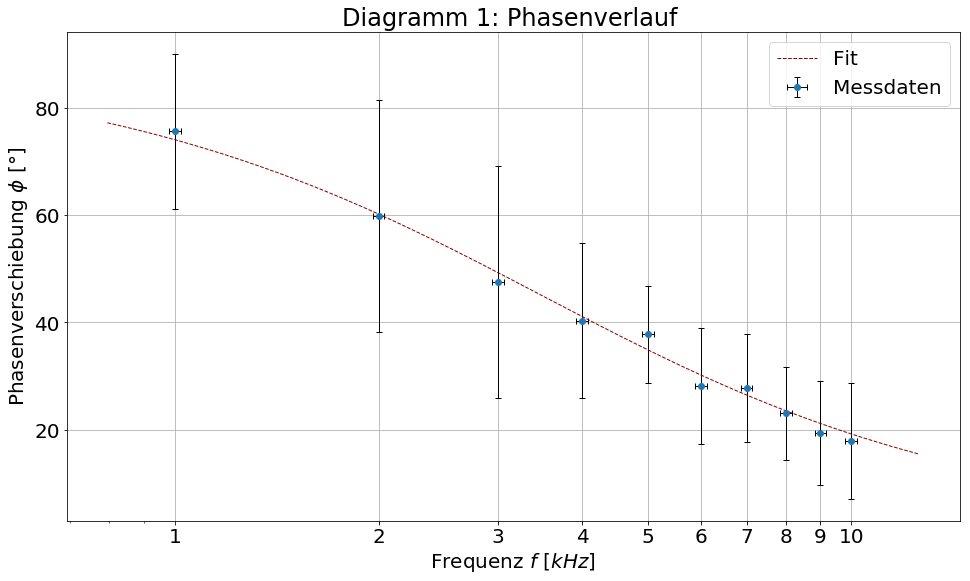

tau = 286.8054421242183  ±  7.208922438113834  [µs]

f_g = 3.4866841876971435  ±  0.0876940328237622  [kHz]

Chi-Quadrat = 0.22676348225393841
Freiheitsgrade = 9
Chi-Quadrat reduziert = 0.025195942472659823
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 100.0 %


In [8]:
f = np.array([1,2,3,4,5,6,7,8,9,10])*1e3
fehler_f = f*2e-2

t = np.array([210.00,83.00,44.00,28.00,21.00,13.00,11.00,8.00,6.00,5.00])*1e-6
fehler_t = np.array([40.0,30.0,20.0,10.0,5.0,5.0,4.0,3.0,3.0,3.0])*1e-6

phi = t*f*360
fehler_phi = np.sqrt((fehler_t/t)**2+(fehler_f/f**2))*phi
                    
#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (rc) = p
    return np.arctan(1/(x*rc))*180/np.pi

model = odr.Model(fit_func)

#darzustellende Daten
x = f
y = phi
delta_x = fehler_f
delta_y = fehler_phi

#Startparameter
para0 = [1.0]

data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0 )
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 16 # um n-Sigma-Umgebung zu zeichnen
popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Plot-Umgebung
x_fit = np.logspace(np.log10(min(x))-0.1, np.log10(max(x))+0.1, 1000)
fit = fit_func(popt, x_fit)
fit_top = fit_func(popt_top, x_fit)
fit_bot = fit_func(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1)
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw=1, ecolor='k', fmt='o', capsize=3, label='Messdaten')
plt.title('Diagramm 1: Phasenverlauf ')
plt.grid(True)
plt.xscale('log')
plt.xticks( [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000],
            [1,2,3,4,5,6,7,8,9,10])
plt.xlabel('Frequenz '+r'${f}$'+' '+r'${[kHz]}$')
plt.ylabel('Phasenverschiebung '+r'${\phi}$' + ' '+r'${[°]}$')
plt.plot(x_fit, fit, c='darkred',ls='--', lw=1, label='Fit')
plt.legend(loc='best')
plt.show()

#Chi-Quadrat orthogonal
from scipy.stats import chi2

dof = x.size-popt.size
chisquare = np.sum(((fit_func(popt, x)-y)**2)/(delta_y**2+((fit_func(popt, x+delta_x)-
                                                            fit_func(popt, x-delta_x))/2)**2))
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100
                    
#Grenzfrequenz
def fit_func_rev(x, p):
    (rc) = p
    return 1/(np.tan(x*np.pi/180)*rc)

phi_g = 45
f_g = fit_func_rev(phi_g, popt)
fehler_f_g = abs(fit_func_rev(phi_g, popt+perr)-fit_func_rev(phi_g, popt-perr))/2


print('tau =', popt[0]*1e6, ' ± ', perr[0]*1e6 , ' [µs]')
print()                    
print('f_g =', f_g[0]*1e-3, ' ± ', fehler_f_g[0]*1e-3 , ' [kHz]')
print()
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob, '%')

In [9]:
#Vergleich der gemessenen Grenzfrequenz mit dem optimalen Fit-Parameter
print('Aus dem Fit ergibt sich die folgende Grenzfrequenz:')
print('f_g =', f_g[0]*1e-3, ' ± ', fehler_f_g[0]*1e-3 , ' [kHz]')
print()

diff_freq_g=np.abs(f_g[0]-freq_grenz_hp)
diff_freq_g_err=np.sqrt((fehler_f_g[0])**2+(freq_grenz_hp_err)**2)

print('Für die Differenz Fit-Experiment folgt somit:')
print('∆(freq_g) = '+str(diff_freq_g)+' ± '+str(diff_freq_g_err)+' \n=> Sigma= '+str(diff_freq_g/diff_freq_g_err))

Aus dem Fit ergibt sich die folgende Grenzfrequenz:
f_g = 3.4866841876971435  ±  0.0876940328237622  [kHz]

Für die Differenz Fit-Experiment folgt somit:
∆(freq_g) = 236.68418769714344 ± 218.3809593185612 
=> Sigma= 1.0838132978062551


\begin{align*}
    f_{gr}^{mes} &= 3.25 \pm 0.02 \ \text{[kHz]}\\
    f_{gr}^{fit} &= 3.49 \pm 0.09 \ \text{[kHz]}\\
    & \Rightarrow 1.08 \sigma
\end{align*}

In [10]:
#Vergleich der gemessen Grenzfrequenzen mit den Theoriewerten
freq_g_theo=1/(2*np.pi*R1*C3)
freq_g_theo_err=freq_g_theo*((R1_err/R1)**2+(C3_err/C3)**2)**0.5

diff_freq_g_hp=np.abs(freq_g_theo-freq_grenz_hp)
diff_freq_g_hp_err=np.sqrt((freq_g_theo_err)**2+(freq_grenz_hp_err)**2)

diff_freq_g_tp=np.abs(freq_g_theo-freq_grenz_tp)
diff_freq_g_tp_err=np.sqrt((freq_g_theo_err)**2+(freq_grenz_tp_err)**2)

print('Aus R und C folgt die f_g_theo mit:')
print('f_g_theo =', freq_g_theo*1e-3 , ' ± ', freq_g_theo_err*1e-3, ' [kHz]')
print()

print('Für die Differenz Theorie-Experiment folgt somit für den Hoch- und Tiefpass:')
print('Sigma= '+str(diff_freq_g_hp/diff_freq_g_hp_err))

Aus R und C folgt die f_g_theo mit:
f_g_theo = 3.3862753849339438  ±  0.37859709756232834  [kHz]

Für die Differenz Theorie-Experiment folgt somit für den Hoch- und Tiefpass:
Sigma= 0.3182686215248944


\begin{align*}
    f_{gr}^{theo} &= 3.39 \pm 0.38 \ \text{[kHz]}\\
    f_{gr}^{mes} &= 3.25 \pm 0.02 \ \text{[kHz]}\\
    & \Rightarrow 0.32 \sigma
\end{align*}

## Teil 4: Frequenzgang eines Serienschwingkreises

### Bestimmung der Induktivität $L_1$

In [11]:
omega_res=2*np.pi*np.array([3.82e3,3.84e3,4.00e3])
omega_res_err=2*np.pi*np.array([0.1e3,0.1e3,0.1e3])

omega_res_mean=np.mean(omega_res)
omega_res_mean_err=1/3*np.sum(omega_res_err**2)**0.5
omega_res_mean_std=np.std(omega_res)/np.sqrt(len(omega_res))

print('Die Grenzfrequenz wurde bestimmt auf:')
print(str(omega_res_mean*1e-3) + ' ± ' + str((omega_res_mean_err+omega_res_mean_std)*1e-3) + ' [kHz]')

Die Grenzfrequenz wurde bestimmt auf:
24.420646893904657 ± 0.6549761542457588 [kHz]


Wir wissen:
\begin{align*}
    \omega_{R} &= \sqrt{\frac{1}{LC}} = 2\pi f_R \\
    \Rightarrow L &= \frac{1}{C} \frac{1}{(2\pi f_R)^2}\\
    \Delta L &= \sqrt{\left(\frac{1}{4 \pi^{2} f_{R}^{2} C^{2}} \Delta C\right)^{2}+\left(\frac{2}{4 \pi^{2} C f_{R}^{3}} \Delta f_{R}\right)^{2}}
\end{align*}



In [12]:
L1=1/(omega_res_mean**2*C3)
L1_err=L1*np.sqrt((2*omega_res_mean_err/omega_res_mean)**2+(C3_err/C3)**2)
L1_std=L1*np.sqrt((2*omega_res_mean_std/omega_res_mean)**2)

print('Aus der ermittelten Grenzfrequenz folgt für die Induktivität:')
print('L1 = ' + str(L1*1e3) + ' ± ' + str((L1_err+L1_std)*1e3) + ' mH')

Aus der ermittelten Grenzfrequenz folgt für die Induktivität:
L1 = 35.67695773946664 ± 4.575634095470602 mH


Somit folgt für die Induktivität $L_1$:

\begin{align}
    L_1 = 35.7 \pm 4.6 \ \text{[mH]}
\end{align}

### Bestimmung des Verlustwiederstandes $R_V$

In einem realen Schwingkreis treten zusätzlich Verluste auf. Der Gesamtwiederstand setzt sich aus diesen Verlustwiederstand $R_V$ und eben den der drei Standartbauteile $R$ zusammen. $R_{ges} = R + R_V$.
Für die Peakbreite gilt: 

\begin{align*}
    \Delta \omega &= 2\pi \Delta f_R = \frac{R_{ges}}{L}\\
    \Rightarrow R_{ges} &= 2\pi \Delta f_R \cdot L \\
    \Delta R_{ges} &= \sqrt{(2\pi \Delta (\Delta f_R) L)^2 + (2\pi \Delta f_R \Delta L)^2}
\end{align*}

In [43]:
# delta_omega=2*np.pi*np.array([5.35e3,1.37e3,0.64e3]) Altprotokoll
# delta_omega=2*np.pi*np.array([4.8e3,0.65e3,0.60e3]) Messprotokoll Aaron Leo
delta_omega=2*np.pi*np.array([5e3,1.295e3,0.669e3]) # [Hz] Selber nochmal nachgemessen anhand der Bilder. 
delta_omega_err=2*np.pi*np.array([0.1e3,0.1e3,0.1e3]) #[Hz]
R=np.array([1000,220,47])
R_err=0.05*R

R_v=delta_omega*L1-R
R_v_err=np.sqrt((delta_omega_err*L1)**2+(delta_omega*L1_std)**2+(R_err)**2)

R_ges=R+R_v
R_ges_err=np.sqrt(R_err**2+R_v_err**2)

print('Für den Gesamtwiderstand ergibt sich R + Rv:')#Daraus folgt für den jew. Gesamtwiderstand R + Rv:
for i in range(0,3):
    print('R_ges_%d = '%(R[i]) + str(R_ges[i]) + ' ± ' + str(R_ges_err[i]) + ' [Ohm]')
print()
print('Daraus folgt für den jew. Verlustwiderstand Rv:')
for i in range(0,3):
    print('Rv_%d = '%(R[i]) + str(R_v[i]) + ' ± ' + str(R_v_err[i]) + ' [Ohm]')



Für den Gesamtwiderstand ergibt sich R + Rv:
R_ges_1000 = 1120.824683367419 ± 78.87964013298345 [Ohm]
R_ges_220 = 290.2935929921615 ± 28.15606263553695 [Ohm]
R_ges_47 = 149.96634263456065 ± 22.943952710368308 [Ohm]

Daraus folgt für den jew. Verlustwiderstand Rv:
Rv_1000 = 120.82468336741908 ± 61.008176726640286 [Ohm]
Rv_220 = 70.2935929921615 ± 25.918407804806993 [Ohm]
Rv_47 = 102.96634263456065 ± 22.82328779943015 [Ohm]


Verlustwiderstand $R_V$ aus Bandbreite $\Delta \omega$ der Resonanzkurven:

| $R$ [$\Omega$] 	| $R_{ges}$ [$\Omega$] 	| $R_{V}$ [$\Omega$] 	|
|----------------	|----------------------	|--------------------	|
| 1000           	| 1120 $\pm$ 76        	| 120 $\pm$ 57       	|
| 220            	| 290 $\pm$ 17         	| 70  $\pm$ 13        	|
| 47             	| 149 $\pm$ 5          	| 103 $\pm$ 5        	|

### Zusatzaufgabe für Physiker: Verlustwiderstand aus Spannungsmessung

Es soll nun der Verlustwiderstand $R_{V}$ aus der Spannungsmessung bestimmt werden. 
\begin{align}
    U_A &= \frac{R}{R+Rv} U_E\\
    \Rightarrow R_V &= \left(\frac{U_E}{U_A} -1 \right) R
\end{align}

In [44]:
U_E=np.ones(3)
U_E_err=0.02*np.ones(3)

U_A=np.array([0.96,0.76,0.37])
U_A_err=0.03*np.ones(3)

R_v2=R*(U_E/U_A-1)
R_v2_err=np.sqrt((R_err*(U_E/U_A-1))**2+(R*U_E_err/U_A)**2+(R*U_E*U_A_err/U_A**2)**2)

R_ges2=R+R_v2
R_ges2_err=np.sqrt(R_err**2+R_v2_err**2)


print('Für den Gesamtwiderstand folgt somit:')
for i in range(0,3):
    print('R_ges_%d = '%(R[i]) + str(R_ges2[i]) + ' ± ' + str(R_ges2_err[i]) + ' [Ohm]')

print()
print('Aus der Spannungsmessung folgt für den Verlustwiderstand: ')
for i in range(0,3):
    print('R_v_%d = '%(R[i]) + str(R_v2[i]) + ' ± ' + str(R_v2_err[i]) + ' [Ohm]')


Für den Gesamtwiderstand folgt somit:
R_ges_1000 = 1041.6666666666667 ± 63.229788746253405 [Ohm]
R_ges_220 = 289.47368421052636 ± 17.238083144624685 [Ohm]
R_ges_47 = 127.02702702702702 ± 11.578735937078926 [Ohm]

Aus der Spannungsmessung folgt für den Verlustwiderstand: 
R_v_1000 = 41.66666666666674 ± 38.70408486059105 [Ohm]
R_v_220 = 69.47368421052633 ± 13.272208199881197 [Ohm]
R_v_47 = 80.02702702702702 ± 11.33775224198355 [Ohm]


Verlustwiderstand $R_V$ aus Maximalspannung $U_A^{max}$ der Resonanzkurven:

| $R$ [$\Omega$] 	| $R_{ges}$ [$\Omega$] 	| $R_{V}$ [$\Omega$] 	|
|----------------	|----------------------	|--------------------	|
| 1000           	| 1041 $\pm$ 63        	| 41 $\pm$ 39        	|
| 220            	| 290 $\pm$ 17         	| 70 $\pm$ 13        	|
| 47             	| 127 $\pm$ 12         	| 80 $\pm$ 11        	|

## Teil 5: Dämpfungskonstanten eines freien gedämpften Schwingkreises

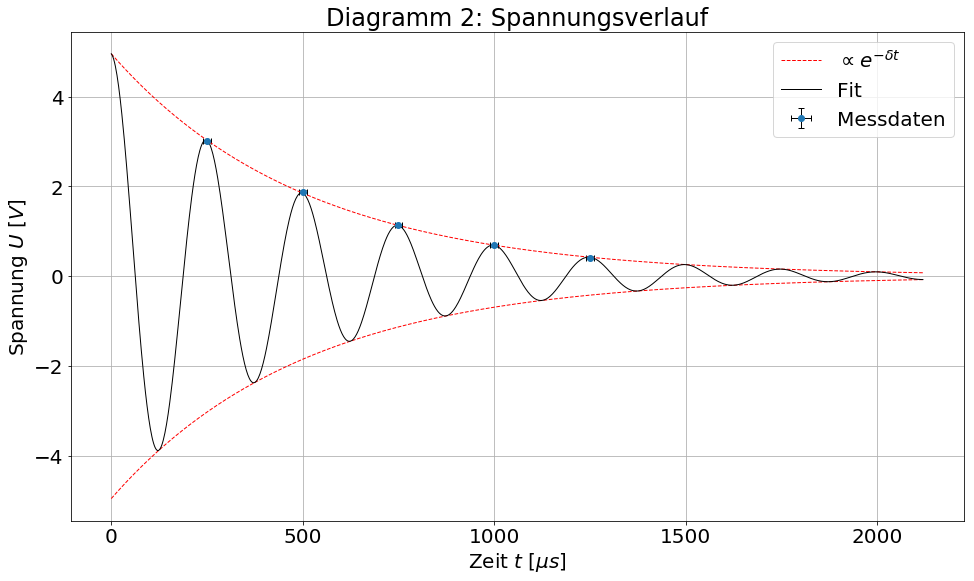

U_0 = 4.95337117387895  ±  0.0716261314444937  [V]
delta = 1.9697507451971719  ±  0.02475301315273899  [kHz]


Chi-Quadrat = 0.7256646257433017
Freiheitsgrade = 3
Chi-Quadrat reduziert = 0.24188820858110058
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 87 %


In [82]:
T = 0.25e3
t = np.array([1,2,3,4,5])*T
fehler_t = np.array([0.01, 0.01, 0.01, 0.01, 0.01])*1e3

U_max = np.array([3.00,1.88,1.13,0.69,0.41])
fehler_U_max = np.array([0.03, 0.03, 0.03, 0.03, 0.03])

#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (A, d) = p
    return A*np.exp(-d*x)

model = odr.Model(fit_func)

#darzustellende Daten
x = t
y = U_max
delta_x = fehler_t
delta_y = fehler_U_max

#Startparameter
para0 = [10.0, 0.0]

data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0 )
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 2 # um n-Sigma-Umgebung zu zeichnen
popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Wechselspannung
def AC(p, x):
    (A, d) = p
    return A*np.exp(-d*x)*np.cos((x/T)*2*np.pi)
                                 
#Plot-Umgebung
x_fit = np.linspace(0, 2120, 1000)
fit = fit_func(popt, x_fit)
fit_AC = AC(popt, x_fit)                          
fit_top = AC(popt_top, x_fit)
fit_bot = AC(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1)
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw=1,ecolor='black', fmt='o', capsize=3, label='Messdaten')
plt.title('Diagramm 2: Spannungsverlauf')
plt.grid(True)
plt.xlabel('Zeit '+r'${t}$'+' '+r'${[μs]}$')
plt.ylabel('Spannung '+r'${U}$' + ' '+r'${[V]}$')
plt.plot(x_fit, fit, color='red' , ls='--', lw=1, label=r'${{\propto}e^{-{\delta}t}}$')
plt.plot(x_fit, -fit, color='red', ls='--', lw=1)
plt.plot(x_fit, fit_AC, color='black', lw=1, label='Fit')
plt.legend(loc='best')
plt.show()

#Chi-Quadrat orthogonal
from scipy.stats import chi2

dof = x.size-popt.size
chisquare = np.sum(((fit_func(popt, x)-y)**2)/(delta_y**2+((fit_func(popt, x+delta_x)-fit_func(popt, x-delta_x))/2)**2))
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100

print('U_0 =', popt[0], ' ± ', perr[0], ' [V]')                 
print('delta =', popt[1]*1e3, ' ± ', perr[1]*1e3, ' [kHz]')
print('\n')
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = {value:.0f}'.format(value=prob), '%')

Daraus folgt für die Dämpfungskonstante $\delta$:

\begin{align}
    \delta = 1.97 \pm 0.02 \ \text{[kHz]}
\end{align}

### Bestimmung der Induktivität der Spule

Für einen freien Schwingkreis kann man die Induktivität  $L$ auch, aus der Resonanzfrequenz $\omega_f$ berechnen:

\begin{align}
    \omega_f &= \sqrt{\frac{1}{LC} - \frac{R^2}{4L^2}}\\
    \Rightarrow L_\pm &= \frac{1 \pm \sqrt{1-(CR\omega)^2}}{2C\omega^2}
\end{align}


Hierbei liefert nur $L_+$ eine physikalische Lösung, die im folgenden betrachten werden. Für den Fehler von $L_+$ gilt:

\begin{align}
    \Delta L_+ &= \sqrt{\left(\frac{d}{dC} L_+ \Delta C\right)^2 + \left(\frac{d}{dR} L_+ \Delta R\right)^2 + \left(\frac{d}{d\omega} L_+ \Delta \omega\right)^2 }\\
\\
    \frac{d}{dC} L_+ &= - \ \frac{R^2}{2\cdot \sqrt{1-(CR\omega)^2}} - \frac{1+ \sqrt{1-(CR\omega)^2}}{2C^2 \omega^2}\\
    \frac{d}{dR} L_+ &= -\frac{CR^2}{2\cdot \sqrt{1-(CR\omega)^2}}\\
    \frac{d}{d\omega} L_+ &= -\frac{CR^2}{2\omega \cdot \sqrt{1-(CR\omega)^2}} - \frac{1+ \sqrt{1-(CR\omega)^2}}{C \omega^3}
\end{align}



Für den Aufbau hatten wir dabei $C$ = (47.0 $\pm$ 4.7) nF und $R$ = (47.0 $\pm$ 2.4) $\Omega$. Für $\omega$ gilt dabei:

\begin{align*}
    \omega &= 2\pi f = \frac{2\pi}{T}\\
    \Delta \omega &= \frac{2\pi}{T^2}\Delta T
\end{align*}

somit erhalten wir:

\begin{align*}
    L_1 = (34 \pm 4) mH
\end{align*}Für einen freien Schwingkreis kann man die Induktivität  $L$ auch, aus der Resonanzfrequenz $\omega_f$ berechnen:

\begin{align}
    \omega_f &= \sqrt{\frac{1}{LC} - \frac{R^2}{4L^2}}\\
    \Rightarrow L_\pm &= \frac{1 \pm \sqrt{1-(CR\omega)^2}}{2C\omega^2}
\end{align}


Hierbei liefert nur $L_+$ eine physikalische Lösung, die im folgenden betrachten werden. Für den Fehler von $L_+$ gilt:

\begin{align}
    \Delta L_+ &= \sqrt{\left(\frac{d}{dC} L_+ \Delta C\right)^2 + \left(\frac{d}{dR} L_+ \Delta R\right)^2 + \left(\frac{d}{d\omega} L_+ \Delta \omega\right)^2 }\\
\\
    \frac{d}{dC} L_+ &= - \ \frac{R^2}{2\cdot \sqrt{1-(CR\omega)^2}} - \frac{1+ \sqrt{1-(CR\omega)^2}}{2C^2 \omega^2}\\
    \frac{d}{dR} L_+ &= -\frac{CR^2}{2\cdot \sqrt{1-(CR\omega)^2}}\\
    \frac{d}{d\omega} L_+ &= -\frac{CR^2}{2\omega \cdot \sqrt{1-(CR\omega)^2}} - \frac{1+ \sqrt{1-(CR\omega)^2}}{C \omega^3}
\end{align}


Für den Aufbau hatten wir dabei $C$ = (47.0 $\pm$ 4.7) nF und $R$ = (47.0 $\pm$ 2.4) $\Omega$. Für $\omega$ gilt dabei:

\begin{align}
    \omega &= 2\pi f = \frac{2\pi}{T}\\
    \Delta \omega &= \frac{2\pi}{T^2}\Delta T
\end{align}

In [60]:
#Resonanzfrequenz aus Aufgabe 4
L1_2=1/(omega_res[2]**2*C3)
L1_2_err=L1_2*np.sqrt((2*omega_res_err[2]/omega_res[2])**2+(C3_err/C3)**2)

print('Aus der in Aufgabenteil 4 ermittelten Resonanzfrequenz folgt:')
print('L1 = ' + str(L1_2) + ' ± ' + str(L1_2_err) + ' H')

Aus der in Aufgabenteil 4 ermittelten Resonanzfrequenz folgt:
L1 = 0.03368390413641549 ± 0.0037659749698305696 H


\begin{align*}
    L_1 = 34 \pm 4 \ \text{[mH]}
\end{align*}

### Logarithmisches Dekrement

Aus der Abnahme der Schwingungsamplituden kann man zudem das logarithmische Dektrement $\Lambda$ und daraus den Gesamtwiderstand $R +R_V$ berechnen. Das logarithmische Dektrement $\Lambda$ ist definiert als 

\begin{align}
    \Lambda &= \ln{\frac{A_n}{A_{n+1}}}\\
    \Delta \Lambda &= \sqrt{\left(\frac{\Delta A_n}{A_n}\right)^2 + 
                            \left(\frac{\Delta A_{n+1}}{A_{n+1}}\right)^2}
\end{align}

In [16]:
A=np.array([3.00,1.88,1.13,0.69,0.41]) #Volt
A_err=0.03*np.ones(5)

Lambda=[]
Lambda_err=[]
for i in range(4):
    a = np.log(A[i]/A[i+1])
    b = np.sqrt((A_err[0]/A[i])**2+(A_err[0]/A[i+1])**2)
    Lambda.append(a)
    Lambda_err.append(b)
    print('Lambda_%d,%d = '%(i+1,i+2) + str(round(a,3)) 
          + ' ± ' + str(round(b,3)))

Lambda_err=np.array(Lambda_err)
Lambda_mean=np.mean(Lambda)
Lambda_mean_err=1/3*np.sum(Lambda_err**2)**0.5
Lambda_mean_std=np.std(Lambda)/np.sqrt(len(Lambda))
print('\n')
print('Das logarithmische Dekrement berechnet sich zu:')
print('Lambda = ' + str(Lambda_mean) + ' ± ' + str(Lambda_mean_err+Lambda_mean_std))

Lambda_1,2 = 0.467 ± 0.019
Lambda_2,3 = 0.509 ± 0.031
Lambda_3,4 = 0.493 ± 0.051
Lambda_4,5 = 0.521 ± 0.085


Das logarithmische Dekrement berechnet sich zu:
Lambda = 0.49755260198797335 ± 0.04517685550437725


Mit den fünf Messwerten erhält man die folgenden Dekremente $\Lambda$:

\begin{align*}
    \Lambda_{12} &= 0.467 \pm 0.019\\
    \Lambda_{23} &= 0.509 \pm 0.031\\
    \Lambda_{34} &= 0.493 \pm 0.051\\
    \Lambda_{45} &= 0.521 \pm 0.085\\
    \\
    \Rightarrow \Lambda &= 0.498 \pm 0.045
\end{align*}

### Gesamtwiderstand

Für  den Gesamtwiderstand $R_{ges}$ wissen wir: 

\begin{align}
    R_{ges} &= R + R_V = \frac{\Lambda \cdot 2L}{T}\\
    \Delta R_{ges} &= \sqrt{\left(\frac{2L}{T} \Delta \Lambda \right)^2 +
                            \left(\frac{2\Lambda}{T} \Delta L \right)^2 +
                            \left(\frac{\Lambda \cdot 2L}{T^2} \Delta T\right)^2}
\end{align}

In [49]:
T=0.25e-3
T_err=0.01e-3
R_ges3=2*L1_2*Lambda_mean/T
R_ges3_err=R_ges3*np.sqrt((L1_2_err/L1_2)**2+(Lambda_mean_err/Lambda_mean)**2+(T_err/T)**2)
R_ges3_std=R_ges3*np.sqrt((Lambda_mean_std/Lambda_mean)**2)

print('Der damit ermittelte Gesamtwiderstand berechnet sich zu:')
print('R_ges = ' + str(round(R_ges3,3)) + ' ± ' + str(round(R_ges3_err+R_ges3_std,3)))

Der damit ermittelte Gesamtwiderstand berechnet sich zu:
R_ges = 134.076 ± 21.22


\begin{align*}
    R_{ges} = 134.076 \pm 21.220 \ \Omega
\end{align*}

### Vergleich mit den Ergebnissen aus Aufgabe 4

In [50]:
diff_R_ges1=np.abs(R_ges[2]-R_ges3)
diff_R_ges1_err=np.sqrt((R_ges_err[2])**2+(R_ges3_err)**2)

diff_R_ges2=np.abs(R_ges2[2]-R_ges3)
diff_R_ges2_err=np.sqrt((R_ges2_err[2])**2+(R_ges3_err)**2)

#Den Vergleich bezüglich des statistischen Fehlers halte ich nicht für sinnvoll, da der stat. Fehler so gering ist.

print('Für die Differenz zu den beiden Werten aus Aufgabe 4 folgt somit:')
print('∆(R_ges1) = '+str(diff_R_ges1)+' ± '+str(diff_R_ges1_err)+
      ' \n=> Sigma= '+str(diff_R_ges1/diff_R_ges1_err))
print('∆(R_ges2) = '+str(diff_R_ges2)+' ± '+str(diff_R_ges2_err)+
      ' \n=> Sigma= '+str(diff_R_ges2/diff_R_ges2_err))

Für die Differenz zu den beiden Werten aus Aufgabe 4 folgt somit:
∆(R_ges1) = 15.890229449064748 ± 29.49378004182303 
=> Sigma= 0.5387654422909489
∆(R_ges2) = 7.0490861584688815 ± 21.852350470382454 
=> Sigma= 0.322577938150079


\begin{align}
    R_{ges}^{\Lambda} &= 134 \pm 21 \ \Omega \\
    R_{ges}^{\Delta \omega} &= 149 \pm 5 \ \Omega \\
    &\Rightarrow 0.54 \sigma\\
    R_{ges}^{U_A} &= 127 \pm 12 \ \Omega\\
    &\Rightarrow 0.32 \sigma
\end{align}

## Teil 6: Resonanzüberhöhung

Aus den Kenngrößen $C$, $R$ und $L$ lässt sich die Resonanzfrequenz $\omega_R = 2\pi f_R$ des Schwingkreises bestimmen.

\begin{align}
    f_R &= \frac{\omega_R}{2\pi} = \frac{1}{2\pi} \sqrt{\frac{L}{C}}\\
    \Delta f_R &= \frac{1}{2\pi} \sqrt{\left(\frac{1}{2} \frac{1}{\sqrt{CL^3}} \Delta L \right)^2 + \left(\frac{1}{2} \frac{1}{\sqrt{C^3L}} \Delta C \right)^2}
\end{align}

Außerdem gilt für die Resonanzfrequenz von Kondensator $f_C$ und Spule $f_L$:

\begin{align}
    f_C &= \frac{1}{2\pi} \sqrt{(\omega_R)^2 - (2\delta)^2}\\
    f_L &= \frac{1}{2\pi} \sqrt{(\omega_R)^2 + (2\delta)^2}
\end{align}

setzt man \ref{eq:w0} ein so folgt:

\begin{align}
f_{c} &=\frac{1}{2 \pi} \sqrt{\frac{1}{L C}-\frac{1}{2} \frac{R^{2}}{L^{2}}}\\
\Delta f_{C} &=\frac{1}{2 \pi} \sqrt{\left(\frac{\left(\frac{R^{2}}{L^{3}}-\frac{1}{C L^{2}}\right) \Delta L}{2 \sqrt{\frac{1}{LC}-\frac{1}{2} \frac{R^{2}}{L^{2}}}}\right)^{2}+\left(\frac{\Delta C}{2 C^{2} L \sqrt{\frac{1}{CL}-\frac{R^{2}}{2L^{2}}}}\right)^{2}+\left(\frac{R \cdot \Delta R}{2 L^{2} \sqrt{\frac{1}{C L}-\frac{C^{2}}{2 L^{2}}}}\right)^2}\\
f_{L} &=\frac{1}{2 \pi} \sqrt{\frac{1}{L C}+\frac{R^{2}}{2 L^{2}}}\\
\Delta f_{L} &=\frac{1}{2 \pi} \sqrt{\left(\frac{\left(\frac{R^{2}}{L^{2}}-\frac{1}{C^{2}}\right) \Delta L}{2 \sqrt{\frac{1}{LC}+\frac{1}{2} \frac{R^{2}}{L^{2}}}}\right)^{2}+\left(\frac{\Delta C}{2 C^{2} L \sqrt{\frac{1}{CL}+\frac{R^{2}}{2L^{2}}}}\right)^{2}+\left(\frac{R \cdot \Delta R}{2 L^{2} \sqrt{\frac{1}{C L}-\frac{l^{2}}{2 L^{2}}}}\right)^2}
\end{align}

### Resonanzfrequenzen am Serienschwingkreis

Mit den gegebenen Kenngrößen unseres Aufbaus: 

\begin{align*}
    C &= 47.0 \pm 4.7 \ \text{[nF]}\\
    R &= 290 \pm 17 \ \text{[$\Omega]$]} \ \text{(aus Teil 4)}\\
    L &= 34 \pm 4 \ \text{[mH]} \ \text{(aus Teil 5)}\\
\end{align*}

In [83]:
#Theoretischer Wert
omega_res_R_theo=1/np.sqrt(L1*C3)
omega_res_R_theo_err=omega_res_R_theo*np.sqrt((0.5*C3_err/C3)**2+(0.5*L1_err/L1)**2)
omega_res_R_theo_std=omega_res_R_theo*np.sqrt((0.5*L1_std/L1)**2)

print('Die theoretische Resonanzfrequenz omega_R ergibt sich aus dem Aufbau zu: ')
print('f_res_R_theo = ' + str(omega_res_R_theo/(2*np.pi)) + ' ± ' + str(omega_res_R_theo_err/(2*np.pi) + omega_res_R_theo_std/(2*np.pi)) + ' s^-1')
print()
omega_res_C_theo=np.sqrt(omega_res_R_theo**2-0.5*(R_ges[1]/L1)**2)
omega_res_C_theo_err=0.5/omega_res_C_theo*np.sqrt((2*omega_res_R_theo*omega_res_R_theo_err)**2+
                                                  (R_ges[1]*R_ges_err[1]/L1**2)**2+(R_ges[1]**2*L1_err/L1**3)**2)
omega_res_C_theo_std=0.5/omega_res_C_theo*np.sqrt((2*omega_res_R_theo*omega_res_R_theo_std)**2+
                                                  (R_ges[1]**2*L1_std/L1**3)**2)

print('Die theoretische Resonanzfrequenz omega_C ergibt sich aus dem Aufbau zu: ')
print('f_res_C_theo = ' + str(omega_res_C_theo/(2*np.pi)) + ' ± ' + str(omega_res_C_theo_err/(2*np.pi) + omega_res_C_theo_std/(2*np.pi)) + ' s^-1')
print()

omega_res_L_theo=np.sqrt(omega_res_R_theo**2+0.5*(R_ges[1]/L1)**2)
omega_res_L_theo_err=0.5/omega_res_L_theo*np.sqrt((2*omega_res_R_theo*omega_res_R_theo_err)**2+
                                                  (R_ges[1]*R_ges_err[1]/L1**2)**2+(R_ges[1]**2*L1_err/L1**3)**2)
omega_res_L_theo_std=0.5/omega_res_L_theo*np.sqrt((2*omega_res_R_theo*omega_res_R_theo_std)**2+
                                                  (R_ges[1]**2*L1_std/L1**3)**2)

print('Die theoretische Resonanzfrequenz omega_L ergibt sich aus dem Aufbau zu: ')
print('omega_res_L_theo = ' + str(omega_res_L_theo/(2*np.pi)) + ' ± ' + str(omega_res_L_theo_err/(2*np.pi) + omega_res_L_theo_std/(2*np.pi)) + ' s^-1')

Die theoretische Resonanzfrequenz omega_R ergibt sich aus dem Aufbau zu: 
f_res_R_theo = 3886.666666666667 ± 327.335410388085 s^-1

Die theoretische Resonanzfrequenz omega_C ergibt sich aus dem Aufbau zu: 
f_res_C_theo = 3777.2563161344747 ± 338.83583302861956 s^-1

Die theoretische Resonanzfrequenz omega_L ergibt sich aus dem Aufbau zu: 
omega_res_L_theo = 3993.0802994402434 ± 320.52192654864814 s^-1


In [84]:
#Resonanzfrequenz aus Abgriff an Widerstand, Kondensator und Spule
omega_res_R=2*np.pi*4.06e3
omega_res_C=2*np.pi*3.93e3
omega_res_L=2*np.pi*4.19e3

omega_res2_err=2*np.pi*0.05e3

### Vergleich der Werte

In [87]:
diff_omega_R=np.abs(omega_res_R_theo-omega_res_R)
diff_omega_C=np.abs(omega_res_C_theo-omega_res_C)
diff_omega_L=np.abs(omega_res_L_theo-omega_res_L)

diff_omega_R_err=np.sqrt(omega_res_R_theo_err**2+omega_res2_err**2)
diff_omega_C_err=np.sqrt(omega_res_C_theo_err**2+omega_res2_err**2)
diff_omega_L_err=np.sqrt(omega_res_L_theo_err**2+omega_res2_err**2)

print('Der Vergleich aus Messwert und Theorie liefert:')
print()
print('∆omega_R = ' + str(diff_omega_R) + ' ± ' + str(diff_omega_R_err) + ' ± ' + str(diff_omega_R_std) +
      '\n=> Sigma = '+str(diff_omega_R/diff_omega_R_err))
print()
print('∆omega_C = ' + str(diff_omega_C) + ' ± ' + str(diff_omega_C_err) + ' ± ' + str(diff_omega_C_std) +
      '\n=> Sigma = '+str(diff_omega_C/diff_omega_C_err))
print()
print('∆omega_L = ' + str(diff_omega_L) + ' ± ' + str(diff_omega_L_err) + ' ± ' + str(diff_omega_L_std) +
      '\n=> Sigma = '+str(diff_omega_L/diff_omega_L_err))

Der Vergleich aus Messwert und Theorie liefert:

∆omega_R = 1089.085453244461 ± 1792.2418204423836 ± 292.2162813989154
=> Sigma = 0.607666577591432

∆omega_C = 959.7168702283525 ± 1853.2623824197237 ± 302.52768690933766
=> Sigma = 0.5178526685332554

∆omega_L = 1237.2829692512678 ± 1756.052641790869 ± 286.17621747903183
=> Sigma = 0.7045819355332388


| Kenngröße                         	| $f_R^{theo}$ [kHz] 	| $f_R^{mes}$ [kHz] 	| $\sigma$-Abweich 	|
|-----------------------------------	|--------------------	|-------------------	|------------------	|
| $R_{ges}$ = 290 $\pm$ 17 $\Omega$ 	| 3.89 $\pm$ 0.33    	| 4.06 $\pm$ 0.05   	| 0.61             	|
| $C$ = 47.0 $\pm$ 4.7 [nF]         	| 3.78 $\pm$ 0.34    	| 3.93 $\pm$ 0.05   	| 0.52             	|
| $L_1$ = 34 $\pm$ 4 [mH]           	| 3.99 $\pm$ 0.32    	| 4.19 $\pm$ 0.05   	| 0.70             	|

## Teil 7: Bandpassfilter

In [107]:
omega_res_bs_theo=omega_res[0]
omega_res_bs_theo_err=omega_res_err[0]
#omega_res_bs_theo=omega_res_R_theo
#omega_res_bs_theo_err=omega_res_R_theo_err


#Messwert
omega_res_bs=2*np.pi*4.11e3
omega_res_bs_err=0.04e3

print(omega_res_bs_theo/(2*np.pi), omega_res_bs_theo_err/(2*np.pi))

3820.0 100.0


### Vergleich der Werte

In [105]:
diff_omega_bs=np.abs(omega_res_bs_theo-omega_res_bs)
diff_omega_bs_err=np.sqrt(omega_res_bs_err**2+omega_res_bs_theo_err**2)

print('Der Vergleich aus Messwert und Theorie liefert:')
print('∆omega_bs = ' + str(diff_omega_bs) + ' ± ' + str(diff_omega_bs_err) + ' s^-1'+
      ' \n=> Sigma= '+str(diff_omega_bs/diff_omega_bs_err))

Der Vergleich aus Messwert und Theorie liefert:
∆omega_bs = 1822.1237390820788 ± 629.5904828089242 s^-1 
=> Sigma= 2.8941411740416654


Bandpassfilter:

\begin{align}
   f_R^{Bandpass} &= f_R^{Serienschwingkreis} \ \text{(theoretisch)}\\
   \Rightarrow f_R^{theo} &= 3.82 \pm 0.10 \ \text{[kHz]}\\
   f_R^{mes} &= 4.11 \pm 0.04 \ \text{[kHz]}\\
   & \Rightarrow 2.89 \sigma
\end{align}

## Teil 8: Signalformung

Aus den generierten Ausdrucken wird die Schaltung mit der besten Filterung des 4 kHz-Signals ausgewählt.

$\rightarrow$ Am besten ist die Filterung für den Bandpassfilter mit $R=47 \ \Omega$.

### Vergleich der Dämpfung des $4 \ kHz$ - Signals

In [108]:
#Umrechnung von dBV in absolute Größen gemäß Formel 68 des Skripts:
#U[V]=1V_rms*10**(L_U[dBV]/20)

#Effektivwerte der Spannungen der drei Frequenzen für die fünf Schaltungen (s1: reines Signal, s2: Hochpassfilter,
#s3: Tiefpassfilter (LC), s4: Bandpassfilter (R=1e3 Ohm), s5: Bandpassfilter (R=47 Ohm))
#f1=100.71 Hz, f2=3.6e3 Hz, f3=8e3 Hz

s1=10**(1/20*np.array([-3.06,-7.75,-11.5]))
s2=10**(1/20*np.array([-31.2,-10.6,-12.4]))
s3=10**(1/20*np.array([-3.1,6.0,-21.8]))
s4=10**(1/20*np.array([-2.8,-9.3,-23.4]))
s5=10**(1/20*np.array([-2.8,6.0,-20.9]))

#Die Verhältnisse zum reinen Signal
v1=s2/s1
v2=s3/s1
v3=s4/s1
v4=s5/s1

print("Verhältnisse zum reinen Signal:")
print(v1)
print(v2)
print(v3)
print(v4)
print()

#Zum Vergleich der Schaltungen werden alle Verhältnisse so "normiert", dass das 4kHz-Signal ungedämpft erscheint
v1_n=v1/v1[1]
v2_n=v2/v2[1]
v3_n=v3/v3[1]
v4_n=v4/v4[1]

print('"Normierte" Verhältnisse zum reinen Signal:')
print(v1_n)
print(v2_n)
print(v3_n)
print(v4_n)

Verhältnisse zum reinen Signal:
[0.03917419 0.72027775 0.90157114]
[0.99540542 4.86967525 0.30549211]
[1.03038612 0.8365656  0.25409727]
[1.03038612 4.86967525 0.33884416]

"Normierte" Verhältnisse zum reinen Signal:
[0.05438761 1.         1.25169927]
[0.20440899 1.         0.06273357]
[1.23168599 1.         0.30373861]
[0.21159237 1.         0.0695825 ]


### Vergleich des $100 \ Hz$-Signals beim Hochpass mit Aufgabenteil 3

In [109]:
print("Durch den Hochpass wird das 100Hz-Signal auf "+str(round(100*v1[0],2))+"% gedämpft.")

#Die in Aufgabe 3 gemessene Dämpfung wird aus Diagramm 6 abgelesen (-28.5dB)
v_auf3=10**(-28.5/20)
print("In Aufgabe 3 ergab sich eine Dämpfung von ca. "+str(round(100*v_auf3,2))+"%.")
print()

#Vergleich der beiden Werte
#In Aufgabe 8 war keine Fehlerabschätzung notwendig, die Ablesung aus Diagramm 6 
#hat einen geschätzten Fehler von 1dB.
print("Mit einem Ablesefehler aus dem Diagramm von 1dB folgt:")
#Damit ergibt sich als 1 Sigma Intervall:
v_auf3_1=10**(-29.5/20)
v_auf3_2=10**(-27.5/20)
print("Das 1 Sigma Intervall geht von "+str(round(100*v_auf3_1,2))+"% bis "+str(round(100*v_auf3_2,2))+"%.")
print("Folglich stimmen die Werte im 1 Sigma Intervall überein, da "+str(round(100*v1[0],2))+
      "% Element des Intervalls ist.")

Durch den Hochpass wird das 100Hz-Signal auf 3.92% gedämpft.
In Aufgabe 3 ergab sich eine Dämpfung von ca. 3.76%.

Mit einem Ablesefehler aus dem Diagramm von 1dB folgt:
Das 1 Sigma Intervall geht von 3.35% bis 4.22%.
Folglich stimmen die Werte im 1 Sigma Intervall überein, da 3.92% Element des Intervalls ist.


## Teil 9: Aufbau eines AM-Empfängers

Dieser Aufgabenteil wird in schriftlicher Form im Messprotokoll kommentiert.